### Notebook to identify and visualise gene markers for Mixed Epithelial cells 

- **Developed by**: Carlos Talavera-López Ph.D
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- v230726

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from pywaffle import Waffle
from bioservices import KEGG
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
appdirs             1.4.4
appnope             0.1.3
asttokens           NA
attr                22.2.0
backcall            0.2.0
bioservices         1.11.2
brotli              NA
bs4                 4.12.2
cattr               NA
cattrs              NA
certifi             2022.12.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
colorlog            NA
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
easydev             0.12.1
exceptiongroup      1.1.1
executing           1.2.0
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
ipywidgets          8.0.7
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.

### Read in Healthy-CTRL dataset

In [3]:
BrEpit_ALL = sc.read_h5ad('../../../data/Epithelial_Mixed_ctl230608_states.raw.h5ad') 
BrEpit_ALL

AnnData object with n_obs × n_vars = 12256 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', '_scvi_batch', '_scvi_labels', 'IAV_score', 'group', 'C_scANVI', 'cell_type', 'leiden', 'leiden_states', 'seed_labels', 'Viral_score', 'C_scANVI_v2', 'mixed_states'
    var: 'mt', 'ribo', 'n_cells_by_counts-V1', 'mean_counts-V1', 'pct_dropout_by_counts-V1', 'total_counts-V1', 'n_cells_by_counts-V2', 'mean_counts-V2', 'pct_dropout_by_counts-V2', 'total_counts-V2', 'n_cells_by_counts-V3', 'mean_counts-V3', 'pct_dropout_by_counts-V3', 'total_counts-V3', 'n_cells_by_counts-V4', 'mean_counts-V4', 'pct_dropout_by_counts-V4', 'total_counts-V4', '

### Visualise manifold with `scANVI` annotation

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No d

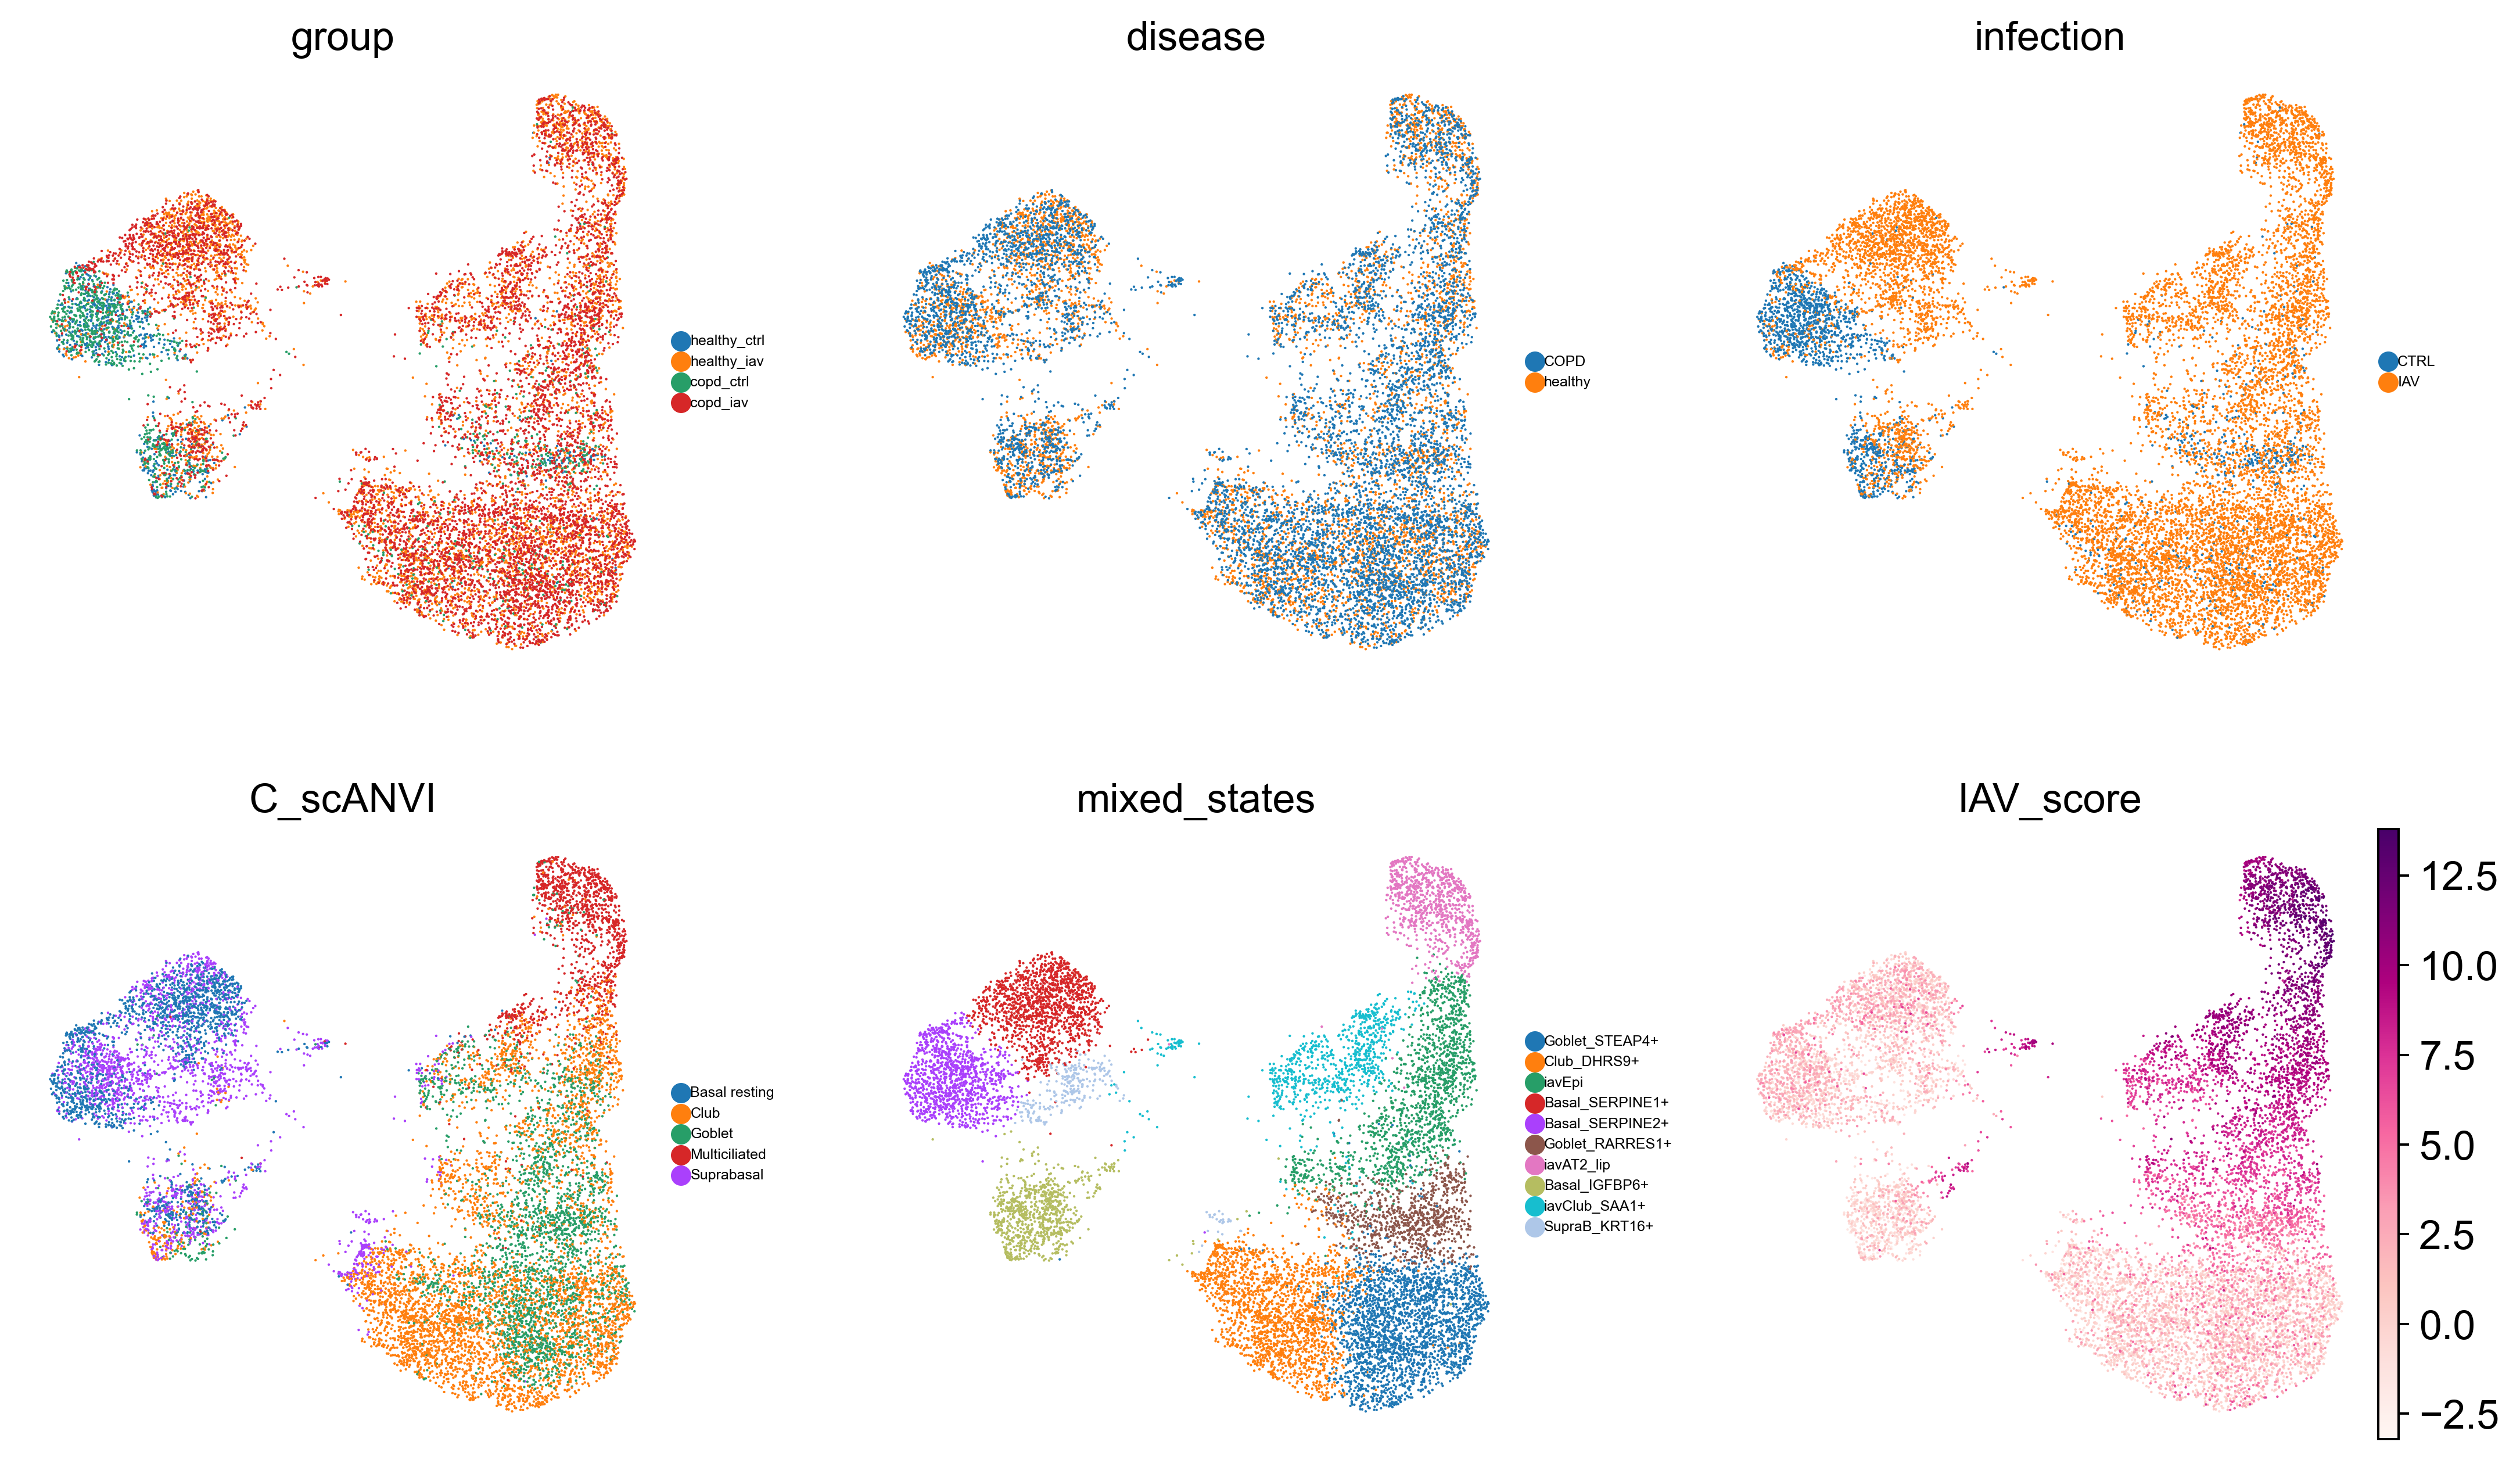

In [4]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['group', 'disease', 'infection', 'C_scANVI', 'mixed_states', 'IAV_score'], size = 3, legend_fontsize = 5, ncols = 3)

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


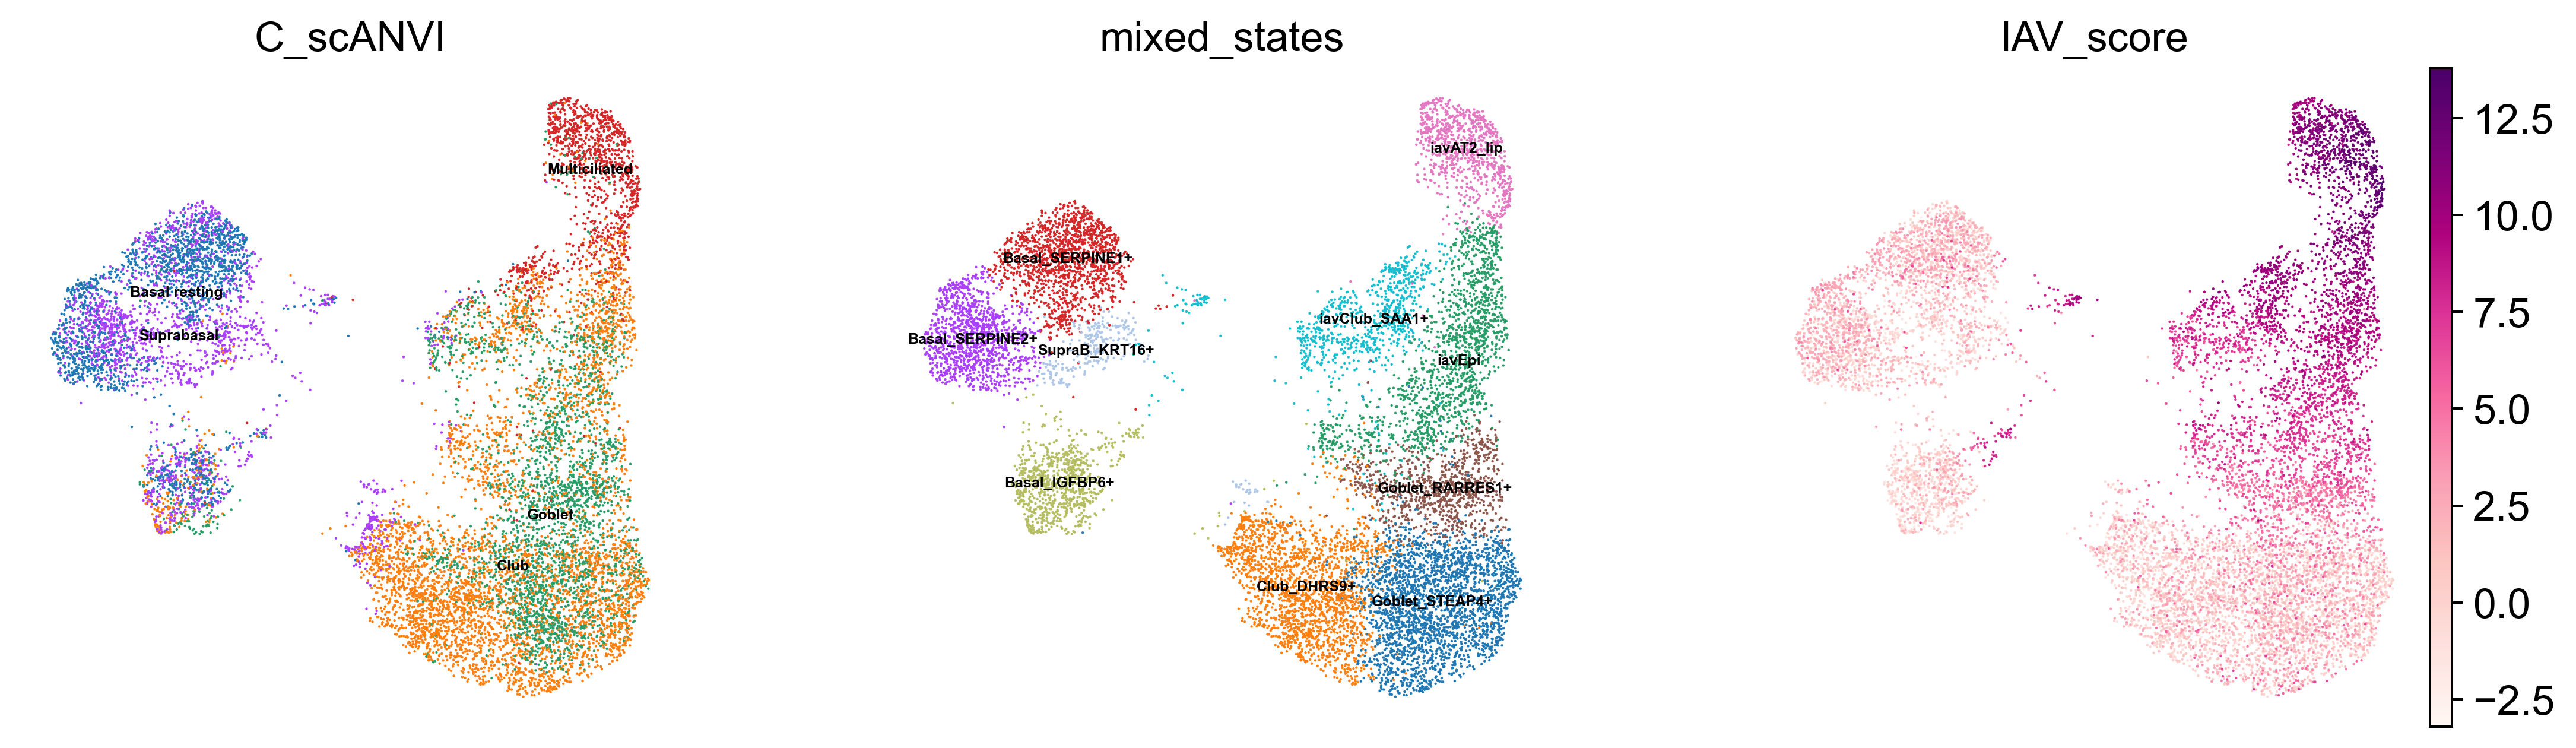

In [5]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['C_scANVI', 'mixed_states', 'IAV_score'], size = 3, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

### Reannotate cell states based on Mareike Lehmann and Wilhelm Bertrand analysis

In [6]:
BrEpit_ALL.obs['mixed_states'].cat.categories

Index(['Goblet_STEAP4+', 'Club_DHRS9+', 'iavEpi', 'Basal_SERPINE1+',
       'Basal_SERPINE2+', 'Goblet_RARRES1+', 'iavAT2_lip', 'Basal_IGFBP6+',
       'iavClub_SAA1+', 'SupraB_KRT16+'],
      dtype='object')

In [7]:
BrEpit_ALL.obs['cell_states'] = BrEpit_ALL.obs['mixed_states'].copy()
BrEpit_ALL.obs['cell_states'] = BrEpit_ALL.obs['cell_states'].cat.rename_categories(['MHCII+Club', 'Club_DHRS9+', 'iavAPC_Epi', 'Basal_SERPINE1+',
       'Basal_SERPINE2+', 'RARRES1+lipGoblet', 'iavClub_lip', 'Basal_IGFBP6+',
       'SCGB1+KRT5-FOXA1+iavClub', 'SupraB_KRT16+'])

BrEpit_ALL.obs['cell_states'].cat.categories

Index(['MHCII+Club', 'Club_DHRS9+', 'iavAPC_Epi', 'Basal_SERPINE1+',
       'Basal_SERPINE2+', 'RARRES1+lipGoblet', 'iavClub_lip', 'Basal_IGFBP6+',
       'SCGB1+KRT5-FOXA1+iavClub', 'SupraB_KRT16+'],
      dtype='object')

In [9]:
BrEpit_ALL.write('../../../data/Epithelial_Mixed_states_locked_ctl230730.raw.h5ad')

### Visualise data covariates in UMAP

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


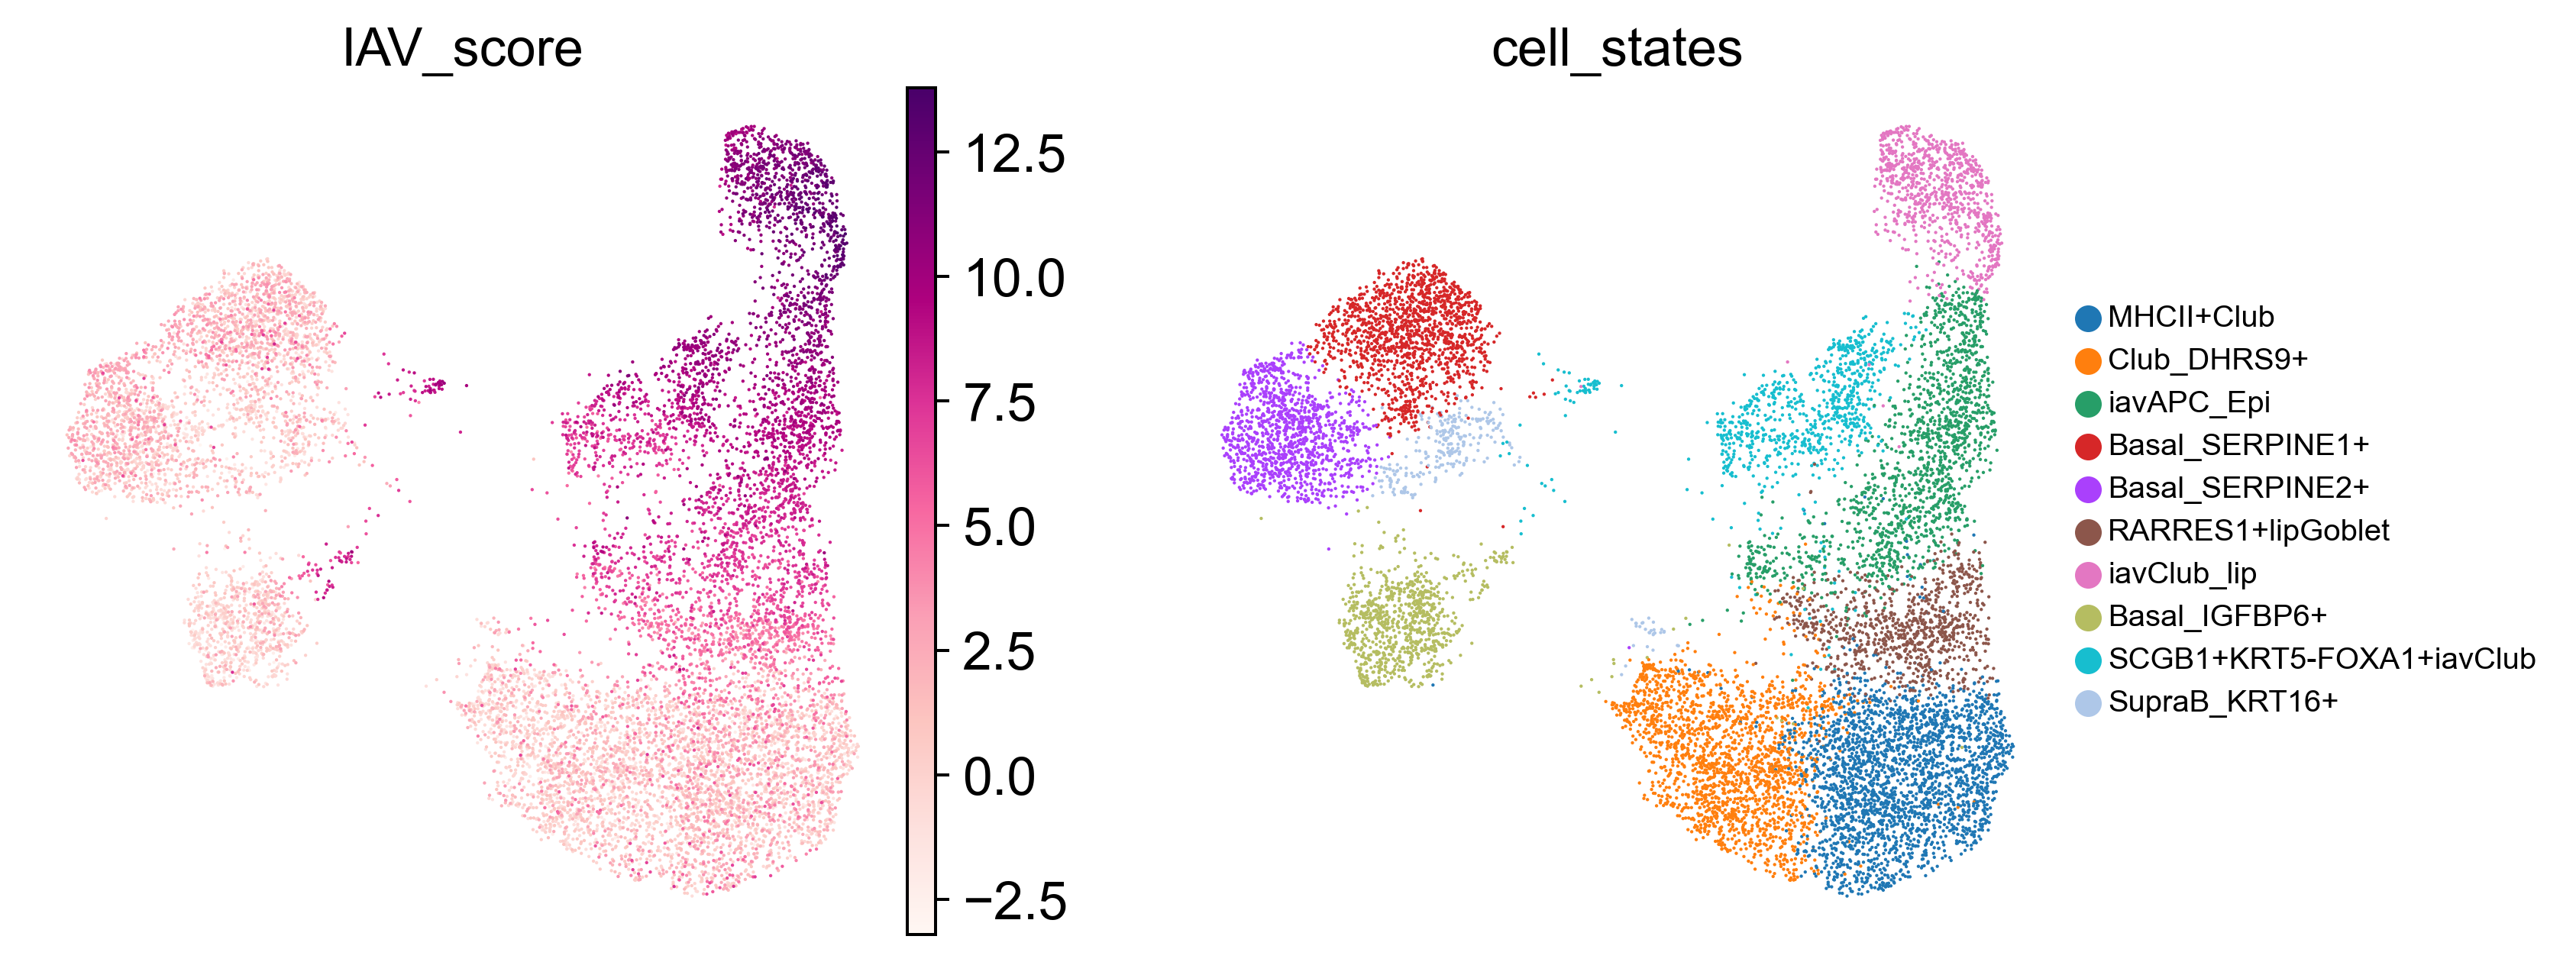

In [8]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['IAV_score', 'cell_states'], size = 3, legend_fontsize = 8, ncols = 3)

### Normalise data for visualisations

In [ ]:
adata_log = anndata.AnnData(X = BrEpit_ALL.X,  var = BrEpit_ALL.var, obs = BrEpit_ALL.obs, obsm = BrEpit_ALL.obsm)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)
adata_log.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(adata_log, inplace = False)["X"]
)

### Visualise proportions of cell states per conditions

In [ ]:
df = adata_log.obs.groupby(['group', 'cell_states']).size().reset_index(name = 'counts')
df['proportions'] = df.groupby('group')['counts'].apply(lambda x: x / x.sum() * 100)
df['waffle_counts'] = (df['proportions'] * 10).astype(int)

In [ ]:
for group in df['group'].unique():
    temp_df = df[df['group'] == group]
    
    data = dict(zip(temp_df['cell_states'], temp_df['waffle_counts']))
    fig = plt.figure(
        FigureClass = Waffle, 
        rows = 8, 
        values = data, 
        title = {'label': f'Group {group}', 'loc': 'left'},
        labels = [f"{k} ({v}%)" for k, v in zip(temp_df['cell_states'], temp_df['proportions'].round(2))],
        #legend = {'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
        legend = {'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
        figsize = (40, 4)
    )
    plt.show()

### Visualise marker genes

In [ ]:
adata_log.obs['cell_states'].cat.categories

In [ ]:
markers = ['SCGB1A1','SCGB3A1','KRT5','MUC5B','KRT17','SFTPC','CD74','MUC5AC','TP63','FOXJ1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'cell_states', dendrogram = True, cmap = 'magma', layer = 'sqrt_norm')

In [ ]:
sc.pl.dotplot(adata_log, markers, groupby = 'cell_states', layer = 'sqrt_norm', cmap = 'magma')

In [ ]:
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KRT5', 'KRT17', 'ACTB', 'SCGB1A1'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

In [ ]:
markers = ['SERPINE1', 'SERPINE2', 'PMEPA1', 'AMIGO2', 'LGALS1', 'MYL9', 'DKK3', 'MMP2']
sc.pl.stacked_violin(adata_log, markers, groupby = 'group', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'group', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'disease', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'infection', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1', 'FN1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'leiden_states', dendrogram = True, cmap = 'RdPu')

### Calculate expression scores

- KEGG Influenza A signature

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa05164')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'KEGG-IAV_Score', use_raw = False)
adata_log.obs['KEGG-IAV_Score'] = BrEpit_ALL.obs['KEGG-IAV_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

- KEGG Interferon alpha

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa04630')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'IFNab_Score', use_raw = False)
adata_log.obs['IFNab_Score'] = BrEpit_ALL.obs['IFNab_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score', 'IFNab_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

- KEGG interferon gamma

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa04622')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'IFNg_Score', use_raw = False)
adata_log.obs['IFNg_Score'] = BrEpit_ALL.obs['IFNg_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score', 'IFNab_Score', 'IFNg_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

- KEGG IL-1

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa04668')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'IL1_Score', use_raw = False)
adata_log.obs['IL1_Score'] = BrEpit_ALL.obs['IL1_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score', 'IFNab_Score', 'IFNg_Score', 'IL1_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_

In [ ]:
sc.tl.rank_genes_groups(adata_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = adata_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

### Visualise marker genes

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_log, n_genes = 5, cmap = 'magma')

### Calculate marker genes per condition

- Split dataset by condition

In [ ]:
healthy_ctrl_log = adata_log[adata_log.obs['group'].isin(['healthy_ctrl'])]
healthy_ctrl_log 

In [ ]:
sc.tl.rank_genes_groups(healthy_ctrl_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_ctrl_log.shape[1], use_raw = False)
result = healthy_ctrl_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_ctrl_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_ctrl_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

In [ ]:
healthy_iav_log = adata_log[adata_log.obs['group'].isin(['healthy_iav'])]
healthy_iav_log 

In [ ]:
sc.tl.rank_genes_groups(healthy_iav_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_iav_log.shape[1], use_raw = False)
result = healthy_iav_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_iav_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_iav_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

In [ ]:
copd_ctrl_log = adata_log[adata_log.obs['group'].isin(['copd_ctrl'])]
copd_ctrl_log 

In [ ]:
sc.tl.rank_genes_groups(copd_ctrl_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_iav_log.shape[1], use_raw = False)
result = copd_ctrl_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_ctrl_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_ctrl_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

In [ ]:
copd_iav_log = adata_log[adata_log.obs['group'].isin(['copd_iav'])]
copd_iav_log 

In [ ]:
sc.tl.rank_genes_groups(copd_iav_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_iav_log.shape[1], use_raw = False)
result = copd_iav_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_iav_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_iav_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

### Export annotated object

In [ ]:
BrEpit_ALL

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden_states', 'STEAP4', 'CEP55', 'FOXJ1', 'PIGR', 'SERPINE2', 'ADM2', 'WNT10A'], size = 1, legend_fontsize = 5, ncols = 4, legend_loc = 'on data')